<a href="https://colab.research.google.com/github/imdad132/Exploratory-and-Statistical-Analysis_World-Libraries_Dataset/blob/main/Copy_of_World_Libraries_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#To import data from the desktop
from google.colab import files
uploaded = files.upload()

Saving World Libraries.csv to World Libraries (3).csv


In [ ]:
#To import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("World Libraries.csv", encoding='latin-1') # Try 'latin-1' encoding, or other encodings like 'ISO-8859-1', 'cp1252' if 'latin-1' doesn't work.

In [ ]:
df.head()

,Country,Region,Expenditures \n(US Dollars),Total Libraries,Total Librarians,Total Volumes,Total Users
0,Afghanistan,Asia,NaN,150,NaN,577300,48133.0
1,Albania,Europe,"$134,036.00",2107,32.0,12398795,581298.0
2,Algeria,Africa,"$641,176.00",760,56.0,4363718,1430.0
3,American Samoa,Oceania,NaN,32,NaN,170009,NaN
4,Andorra,Europe,"$5,777,651.00",39,6.0,222869,16596.0


In [ ]:
# Check the missing values in the dataset
df.isnull().sum()



,0
Country,0
Region,0
Expenditures \n(US Dollars),73
Total Libraries,0
Total Librarians,56
Total Volumes,0
Total Users,39


In [ ]:
print(df.columns)

Index(['Country', 'Region', 'Expenditures \n(US Dollars)', 'Total Libraries',
       'Total Librarians', 'Total Volumes', 'Total Users'],
      dtype='object')


In [ ]:
#Change the column name 'Expenditures \n(US Dollars)' to 'Expenditures'
df.rename(columns={'Expenditures \n(US Dollars)': 'Expenditures'}, inplace=True)

In [ ]:
df.head()

,Country,Region,Expenditures,Total Libraries,Total Librarians,Total Volumes,Total Users
0,Afghanistan,Asia,NaN,150,NaN,577300,48133.0
1,Albania,Europe,"$134,036.00",2107,32.0,12398795,581298.0
2,Algeria,Africa,"$641,176.00",760,56.0,4363718,1430.0
3,American Samoa,Oceania,NaN,32,NaN,170009,NaN
4,Andorra,Europe,"$5,777,651.00",39,6.0,222869,16596.0


In [ ]:
#Drop all the rows with missing values
df.dropna(inplace=True)

In [ ]:
df.head()

,Country,Region,Expenditures,Total Libraries,Total Librarians,Total Volumes,Total Users
1,Albania,Europe,"$134,036.00",2107,32.0,12398795,581298.0
2,Algeria,Africa,"$641,176.00",760,56.0,4363718,1430.0
4,Andorra,Europe,"$5,777,651.00",39,6.0,222869,16596.0
9,Armenia,Asia,"$133,148.00",2555,1430.0,30935507,13615227.0
11,Australia,Oceania,"$1,927,384,739.00",11052,9021.0,128150151,14477916.0


In [ ]:
#Drop columns "Country", "Expenditures", and "Total Librarians"
df.drop(["Country", "Expenditures", "Total Librarians"], axis=1, inplace=True)

In [ ]:
df.head()

,Region,Total Libraries,Total Volumes,Total Users,Volumes per Library,Users per Library
1,Europe,2107,12398795,581298.0,5884.572852,275.888942
2,Africa,760,4363718,1430.0,5741.734211,1.881579
4,Europe,39,222869,16596.0,5714.589744,425.538462
9,Asia,2555,30935507,13615227.0,12107.830528,5328.855969
11,Oceania,11052,128150151,14477916.0,11595.200054,1309.981542


In [ ]:

#Correlating total libraries, total volums and total users
# Selecting only numerical columns for correlation
numerical_columns = ['Total Libraries', 'Total Volumes', 'Total Users']
correlation_matrix = df[numerical_columns].corr()
print(correlation_matrix)

                 Total Libraries  Total Volumes  Total Users
Total Libraries         1.000000       0.346436     0.184668
Total Volumes           0.346436       1.000000     0.362723
Total Users             0.184668       0.362723     1.000000


In [ ]:
# Detailed analysis of how regions compare
print("\nDetailed Regional Analysis:")
for metric in ['Total Libraries', 'Total Volumes', 'Total Users']:
    total = df[metric].sum()
    print(f"\n{metric} Distribution by Region:")
    region_pct = df.groupby('Region')[metric].sum() / total * 100
    print(region_pct.sort_values(ascending=False))


Detailed Regional Analysis:

Total Libraries Distribution by Region:
Region
Asia             50.106430
Europe           29.252489
North America    10.078933
Latin America     4.975996
Middle East       2.351254
Africa            2.024716
Oceania           1.210184
Name: Total Libraries, dtype: float64

Total Volumes Distribution by Region:
Region
Europe           58.022649
Asia             20.177540
North America    17.748889
Latin America     1.916036
Oceania           1.002547
Middle East       0.637347
Africa            0.494992
Name: Total Volumes, dtype: float64

Total Users Distribution by Region:
Region
Asia             46.075628
Europe           21.188290
North America    20.363946
Latin America     7.062109
Middle East       2.873235
Oceania           1.238325
Africa            1.198468
Name: Total Users, dtype: float64


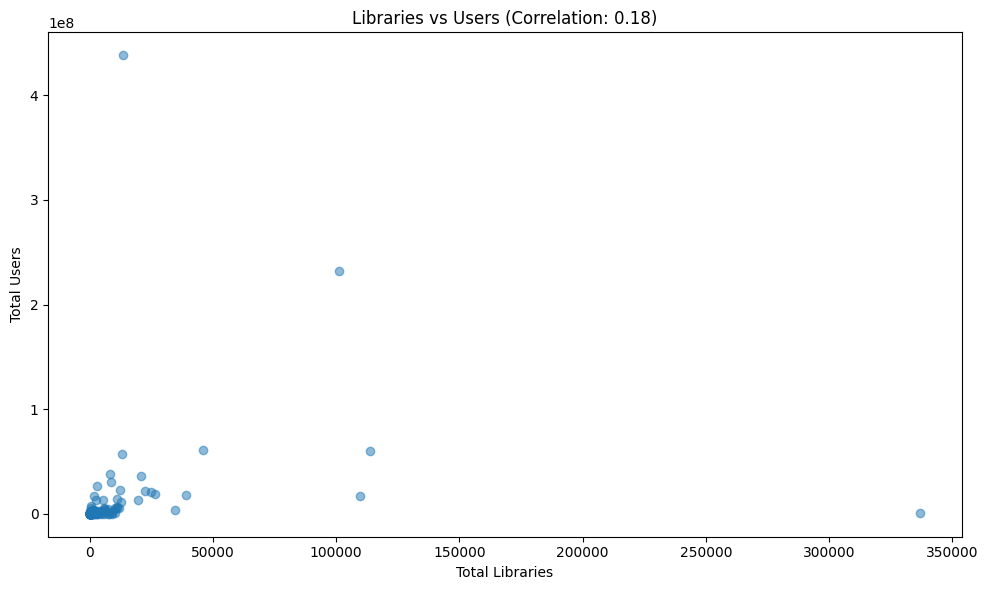

In [ ]:
# Scatter plot of Libraries vs Users

# Calculate the correlation between Total Libraries and Total Users
correlation = df['Total Libraries'].corr(df['Total Users'])

plt.figure(figsize=(10, 6))
plt.scatter(df['Total Libraries'], df['Total Users'], alpha=0.5)
plt.title(f'Libraries vs Users (Correlation: {correlation:.2f})') # Now 'correlation' is defined
plt.xlabel('Total Libraries')
plt.ylabel('Total Users')
plt.tight_layout()
plt.savefig('libraries_vs_users.png')

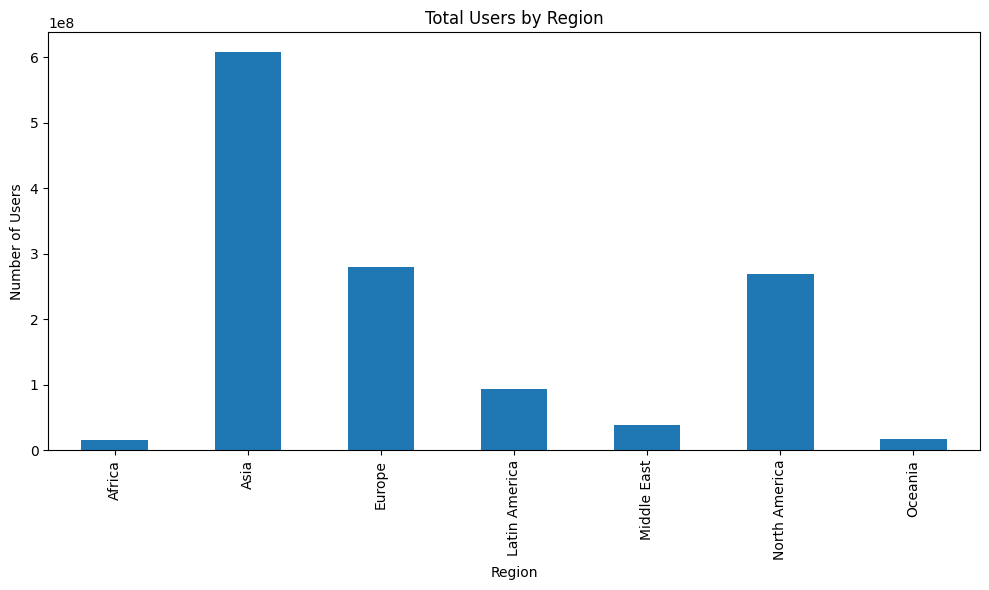

In [ ]:
# Plot regions by total users
plt.figure(figsize=(10, 6))
users_by_region = df.groupby('Region')['Total Users'].sum()
users_by_region.plot(kind='bar')
plt.title('Total Users by Region')
plt.ylabel('Number of Users')
plt.tight_layout()
plt.savefig('users_by_region.png')

In [ ]:
# Create an interactive choropleth-style visualization for regions

!pip install geopandas

import folium
import geopandas as gpd

# Create colored circles for each region at representative locations
region_locations = {
    'Europe': [50, 15],
    'North America': [40, -100],
    'Asia': [35, 105],
    'Latin America': [-15, -60],
    'Africa': [0, 20],
    'Middle East': [30, 45],
    'Oceania': [-25, 135]
}

# Create a base map
m = folium.Map(location=[0, 0], zoom_start=2)  # Adjust location and zoom as needed

# Calculate total libraries by region
libraries_by_region = df.groupby('Region')['Total Libraries'].sum().reset_index()

# Add region markers
for region, location in region_locations.items():
    # Get region statistics
    total_libraries = libraries_by_region[libraries_by_region['Region'] == region]['Total Libraries'].values[0] if region in libraries_by_region['Region'].values else 0

    # Create a tooltip with region name and total libraries
    tooltip_text = f"{region}: {total_libraries} libraries"

    # Create a circle marker for the region with tooltip
    folium.CircleMarker(
        location=location,
        radius=total_libraries / 10000,  # Adjust radius scaling as needed
        color='dark green',  # Choose a color
        fill=True,
        fill_color='green',
        fill_opacity=0.6,
        tooltip=tooltip_text  # Add the tooltip here
    ).add_to(m)

# 3. Display the map
m.save('libraries_by_region_map.html') # Save the map to an HTML file
display(m)  # Display the map in the notebook if you are using a notebook environment